In [176]:
from tile import create_tiles
import random
import copy

In [177]:
tiles = create_tiles()

In [178]:
class Cell:
    def __init__(self, possible_tiles):
        self.possible_tiles = possible_tiles
        self.collapsed_tile = None

    def is_collapsed(self):
        return self.collapsed_tile is not None

    def collapse(self):
        if not self.is_collapsed():
            if not self.possible_tiles:
                raise ValueError("No valid tiles left to choose from.")
            self.collapsed_tile = random.choice(self.possible_tiles)
            self.possible_tiles = [self.collapsed_tile]
def create_grid(n):
    all_tiles = tiles
    return [[Cell(all_tiles) for _ in range(n)] for _ in range(n)]

def get_neighbors(grid, x, y):
    neighbors = []
    if x > 0:
        neighbors.append((x - 1, y))
    if x < len(grid) - 1:
        neighbors.append((x + 1, y))
    if y > 0:
        neighbors.append((x, y - 1))
    if y < len(grid) - 1:
        neighbors.append((x, y + 1))
    return neighbors

def update_neighbors(grid, x, y):
    tile = grid[x][y].collapsed_tile
    neighbors = get_neighbors(grid, x, y)
    for nx, ny in neighbors:
        neighbor = grid[nx][ny]
        if not neighbor.is_collapsed():
            valid_tiles = []
            for neighbor_tile in neighbor.possible_tiles:
                if match(tile, neighbor_tile, (nx - x, ny - y)):
                    valid_tiles.append(neighbor_tile)
            neighbor.possible_tiles = valid_tiles
            if not valid_tiles:
                raise ValueError("No valid tiles left after update.")

def match(tile, neighbor_tile, direction):
    if direction == (-1, 0):  # neighbor is above
        return tile.edges[0] == neighbor_tile.edges[2]
    elif direction == (1, 0):  # neighbor is below
        return tile.edges[2] == neighbor_tile.edges[0]
    elif direction == (0, -1):  # neighbor is to the left
        return tile.edges[3] == neighbor_tile.edges[1]
    elif direction == (0, 1):  # neighbor is to the right
        return tile.edges[1] == neighbor_tile.edges[3]
def wave_function_collapse(n):
    while True:
        grid = create_grid(n)
        try:
            while any(not cell.is_collapsed() for row in grid for cell in row):
                non_collapsed_cells = [(x, y) for x in range(n) for y in range(n) if not grid[x][y].is_collapsed()]
                x, y = random.choice(non_collapsed_cells)
                grid[x][y].collapse()
                update_neighbors(grid, x, y)
            return grid
        except ValueError:
            pass

done


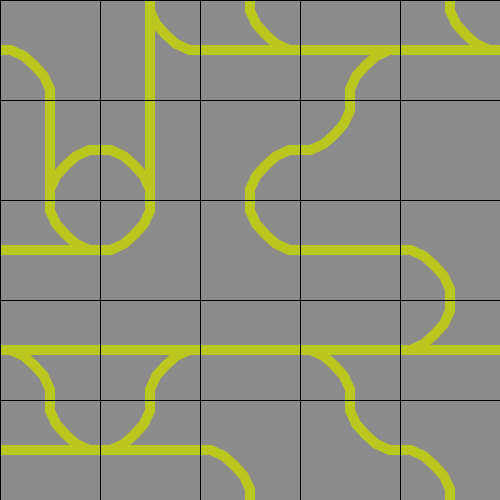

In [179]:
from PIL import Image, ImageDraw

#each tile.img is 100x100 pixels

def draw_grid(grid):
    n = len(grid)
    img = Image.new('RGB', (n * 100, n * 100), color='white')
    draw = ImageDraw.Draw(img)
    for x in range(n):
        for y in range(n):
            tile = grid[x][y].collapsed_tile
            if tile:
                img.paste(tile.img, (y * 100, x * 100))
    # draw grid lines
    for i in range(n):
        draw.line((0, i * 100, n * 100, i * 100), fill='black')
        draw.line((i * 100, 0, i * 100, n * 100), fill='black')
    
    # resize to 1000x1000 pixels
    img = img.resize((500, 500))
    return img

grid = wave_function_collapse(5)
print('done')
draw_grid(grid)